# Lexicon Analysis

This notebook performs a lexical analysis of bioinformatics job listings. It standardizes terms in job descriptions, categorizes them into areas, and counts their occurrences. The analysis is visualized through bar plots to identify the most frequently mentioned technologies and skills.

First, let's import the necessary dependencies, then load and display our dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

from fuzzywuzzy import fuzz
from unidecode import unidecode

C:\Users\adrie\AppData\Roaming\Python\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_csv('job_bioinfo_csv/bioinf_ads_preprocessed.csv')
df.head(2)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type,word_count,text_result,title_result
0,0,0,0,http://diffbot.com/entity/JOB966384586,en,JOB966384586,1591962958,"Bioinformatics Specialist, GIS",https://www.nature.com/naturecareers/job/bioin...,NaN,NaN,The Genomics Institute of Singapore () has an ...,NaN,The Genomics Institute of Singapore () has an ...,"Bioinformatics Specialist, GIS",Job,130,genomics institute singapore exciting opportun...,bioinformatics specialist gis
1,1,1,1,http://diffbot.com/entity/JOB1028283361,en,JOB1028283361,1549734701,Postdoctoral Fellowship in Bioinformatics and ...,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,"The laboratories of Drs. Jeffrey Pessin, Fajun...",NaN,"The laboratories of Drs. Jeffrey Pessin, Fajun...",Postdoctoral Fellowship in Bioinformatics and ...,Job,231,laboratories drs jeffrey pessin fajun yang dey...,postdoctoral fellowship bioinformatics molecul...


### 1. **Terms normalization**
Firstly, we need to standardize the texts in the **text_result** column by replacing variant terms with their normalized forms. This is to ensure data consistency, especially when different terms are used to refer to the same concept.

For example, after performing this step:

**'Cheminformatics'** is replaced by **'chemoinformatic'**.

**'GitHub'** is replaced by **'git'**.

#### Creating a New Column for Normalization
This new column will be used to store the normalized texts.

In [3]:
df['text_result_normalized'] = df['text_result']

In [4]:
normalization = {        
    'cheminformatics': 'chemoinformatic',
    'chemoinformatics' : 'chemoinformatic',
    'investigators': 'investigator',
    'postodoctoral': 'postdoctoral position',
    'applications': ' application',          
    'bioengineerings': 'bioengineering',          
    'bioinformatics': 'bioinformatic',           
    'translational': 'translationa',
    
    
    'bioinformatic developer': 'bioinformatic software developer',
    'bioinformatic pipeline developer':'bioinformatic software developer',
    'lead software developer bioinformatic':'bioinformatic software developer',
    'bioinformatic programmer':'bioinformatic software developer',
    'biostatistician':'biostatistical',
    'postdoctoral positions': 'postdoctoral position',
    'post doctoral':'postdoctoral position',
    'post doc':'postdoctoral position',
    'postdoctoral researcher':'postdoctoral position',
    'postdoctoral research':'postdoctoral position',
    'phd position':'postdoctoral',
    'phd':'postdoctoral',
    'fellowship':'fellow',
    'associate professor':'assistant professor',
    'research associate':'research assistant',
    
    'genomics':'genomic',
    'metagenomics':'metagenomic',
    'transcriptomics':'transcriptomic',
    'meta transcriptomic':'metatranscriptomic',
    'proteomics':'proteomic',
    'meta proteomic':'metaproteomic',
    'metabolomics':'metabolomic',
    
    
    'computational genomic':'computational_genomic',
    'population genomic':'population_genomic',
    'viral genomic':'viral_genomic',
    'chemical genomic':'chemical_genomic',
    
    'reactjs':'react',
    'react js':'react',
    'angularjs':'angular',
    'angular js': 'angular',
    'node js':'nodejs',
    

    'github': 'git',          
    'gitlab': 'git',  

    'geo': 'gene expression omnibus',
    'gtex': 'genotype tissue expression',
    'bwa': 'burrows wheeler aligner',
    'gatk': 'genome analysis toolkit',
    'sra': 'sequence read archive',
    'lsf':'load sharing facility',
    'sge':'sun grid engine',
    'svn' : 'subversion',
    'c++': 'c_plus_plus',
    'c#': 'c_sharp',
    
                    
    'abioinformatician':'bioinformatician', 
    'abioinformatics':'bioinformatic', 
    'abioinformatics':'bioinformatic',
    'acomputational':'computational',
    'actinomycetes':'actinomycete',
    'administrations':'administration',
    'administrators':'administrator',
    'advancements':'advancement',
    'affiliations':'affiliation',
    'aindependently':'independently', 
    'alternatives':'alternative',
    'analysisexperience':'analysis experience', 
    'analysisexperienced':'analysis experience',
    'announcement':'announcements',
    'announcements':'announcement',
    'apostdoctoral':'postdoctoral',
    'applications':'application',
    'appointments':'appointment',
    'approachesto':'approacheso',
    'architectures':'architecture',
    'arearequirements':'area requirements',
    'arerequirements':'area requirements',
    'astatistical':'statistical', 
    'astrazenecas':'astrazeneca',
    
    
    'backgroundbs':'backgrounds',
    'bacteriophages':'bacteriophage',
    'bimolecular':'biomolecular',
    'biochemistryo':'biochemistry',
    'bioinfomatics':'bioinfomatic',
    'bioinformatican':'bioinformatic',
    'bioinformatich':'bioinformatic',
    'bioinformaticians':'bioinformatician', 
    'bioinformaticists':'bioinformaticist', 
    'bioinformaticsa':'bioinformatic',
    'bioinformaticsas':'bioinformatic',
    'bioinformaticsat':'bioinformatic',
    'bioinformaticscandidate':'bioinformatic candidate',
    'bioinformaticscandidates':'bioinformatic candidate',
    'bioinformtic':'bioinformatic',
    'bionformatics':'bioinformatic',
    'biospecimens':'biospecimen', 
    'biostatisticians':'biostatistician',
    'biotechnology+':'biotechnology', 
    'breakthroughs':'breakthrough',

    'calculations':'calculation', 
    'capplication':'application',
    'centernational':'center national',
    'centersnational':'center national',
    'certificated':'certificate'
}

for key, value in normalization.items():
    df['text_result_normalized'] = df['text_result_normalized'].str.replace(key, value)

### 2. **Create category dataframes** 
Analyze and categorize terms according to the categories provided in dic_ads.

In [5]:
def create_category_dataframes(df, dic_ads):
    dataframes_by_category = {}

    for category, words in dic_ads.items():
        occurrences = {}
        for word in words:
            pattern = r'\b{}\b'.format(word)
            occurrences[word] = df['text_result_normalized'].apply(lambda x: 1 if re.search(pattern, str(x)) else 0).sum()

        df_occurrences = pd.DataFrame.from_dict(occurrences, orient='index', columns=['count'])
        df_occurrences = df_occurrences.sort_values('count', ascending=False)
        dataframes_by_category[category] = df_occurrences

    return dataframes_by_category

In [6]:
def get_dataframes_list(df, dic_ads):
    dataframes_by_category = create_category_dataframes(df, dic_ads)
    return [dataframes_by_category[category] for category in dic_ads.keys()]

### 3. **Technologies**

In [7]:
dic_ads = {
    "Gene Expression": [
        "arrayexpress",
        "gene expression omnibus", 
        "genotype tissue expression",
    ],
    "(meta)Genomics": [
        "burrows wheeler aligner",
        "cbioportal",
        "broad firehose",
        "genome analysis toolkit",
        #"pcawg",
        "samtools",
        "picard",
        "chip seq",
        "clip seq",
        "atac seq",
        "hi c",
        "rna seq",
        "scrna seq",
        "ribo seq"
    ],
    "Databases_b": [
        "genbank", 
        "uniprot",
        "sequence read archive",
        #"swissprot",
        #"kegg",
        #"gnomad",
        #"clinvar",
        "cosmic",
        "ensembl",
        "dbgap",
        "omim"
    ],
    "Web Development": [
        "ajax",
        "angular",
        "bokeh",
        "css",
        "html",
        "jquery",
        "json",
        #"sass",
        "apis",
        "django",
        "nodejs",
        "rest api",
        "rails",
        #"spring",
        "react",
    ],
    "Databases_c": [
        #"mariadb",
        "mongodb",
        "nosql",
        "sql",
        "postgresql",
        "mysql",
        "sqlite",
        "elasticsearch"
    ],
    "Version Control and Management Systems": [
        "git",
        "jira",
        "subversion",
        "aws",
        "load sharing facility",
        "sun grid engine",
        "slurm",
        "confluence",
        "sdlc",
        "azure",
        "gcp",
    ],
    "Statistical and Data Analysis": [
        "enzyme",
        "ggplot",
        "numpy",
        "pandas",
        "scipy",
        "keras",
        "pytorch",
        "tensorflow",
        "sas",
        "spss",
        "stata",
        "gnuplot"
    ],
    "Scripting and Automation": [
        "bash",
        "chef",
        "puppet",
        "jenkins"
    ],
    "Linguagens": [
        "asp",
        "awk",
        "c",
        "c_sharp",
        "c_plus_plus", 
        "cassandra",
        "fortran", 
        "golang",
        "groovy", 
        "java", 
        "javascript", 
        "julia", 
        "matlab", 
        "nim",
        "perl",
        "php", 
        "python",
        "r", 
        "ruby",
        "rust", 
        "scala",
    ]
}

In [8]:
dataframes_by_category = create_category_dataframes(df, dic_ads)

In [9]:
df_list = get_dataframes_list(df, dic_ads)

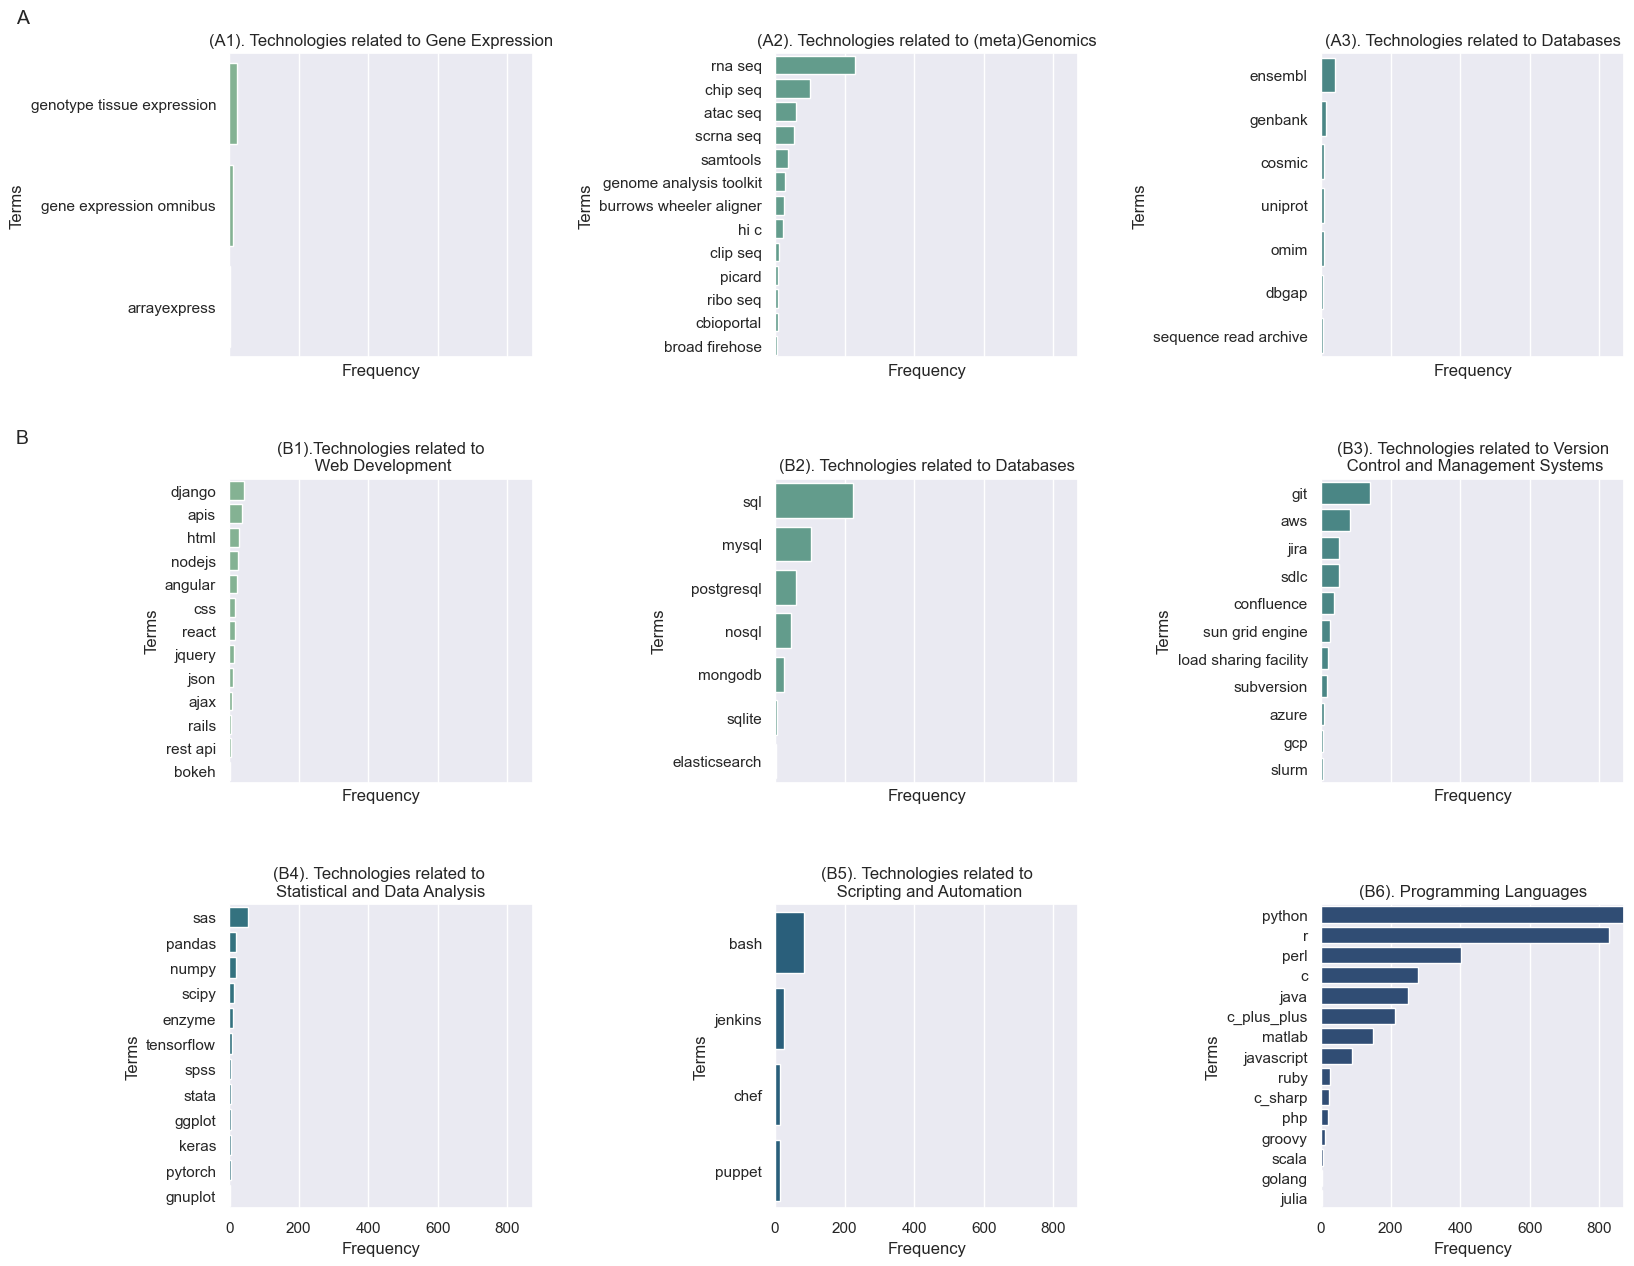

In [10]:
sns.set()
bars = 15
palette = "crest"

df_top_0 = df_list[0].head(bars)
custom_palette_0 = [sns.color_palette(palette)[0]]

df_top_1 = df_list[1].head(bars)
custom_palette_1 = [sns.color_palette(palette)[2]]

df_top_2 = df_list[2].head(bars)
custom_palette_2 = [sns.color_palette(palette)[3]]

df_top_3 = df_list[3].head(bars)
custom_palette_0 = [sns.color_palette(palette)[0]]

df_top_4 = df_list[4].head(bars)
custom_palette_1 = [sns.color_palette(palette)[1]]

df_top_5 = df_list[5].head(bars)
custom_palette_2 = [sns.color_palette(palette)[2]]

df_top_6 = df_list[6].head(bars)
custom_palette_3 = [sns.color_palette(palette)[3]]

df_top_7 = df_list[7].head(bars)
custom_palette_4 = [sns.color_palette(palette)[4]]

df_top_8 = df_list[8].head(bars)
custom_palette_5 = [sns.color_palette(palette)[5]]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15), sharex=True, gridspec_kw={"hspace": 0.4, "wspace": 0.8})
sns.barplot(ax=axes[0, 0], x='count', y=df_top_0.index, data=df_top_0, palette=custom_palette_0)
axes[0, 0].set_xlabel('Frequency', fontsize=12) 
axes[0, 0].set_ylabel('Terms', fontsize=12)
axes[0, 0].set_title('(A1). Technologies related to Gene Expression', fontsize=12)


sns.barplot(ax=axes[0, 1], x='count', y=df_top_1.index, data=df_top_1, palette=custom_palette_1)
axes[0, 1].set_xlabel('Frequency', fontsize=12) 
axes[0, 1].set_ylabel('Terms', fontsize=12)
axes[0, 1].set_title('(A2). Technologies related to (meta)Genomics', fontsize=12)

sns.barplot(ax=axes[0, 2], x='count', y=df_top_2.index, data=df_top_2, palette=custom_palette_2)
axes[0, 2].set_xlabel('Frequency', fontsize=12) 
axes[0, 2].set_ylabel('Terms', fontsize=12)
axes[0, 2].set_title('(A3). Technologies related to Databases', fontsize=12)


sns.barplot(ax=axes[1, 0], x='count', y=df_top_3.index, data=df_top_3, palette=custom_palette_0, orient='h')
axes[1,0].set_xlabel('Frequency', fontsize=12) 
axes[1,0].set_ylabel('Terms', fontsize=12)
axes[1,0].set_title('(B1).Technologies related to\n Web Development', fontsize=12)

sns.barplot(ax=axes[1, 1], x='count', y=df_top_4.index, data=df_top_4, palette=custom_palette_1, orient='h')
axes[1, 1].set_xlabel('Frequency', fontsize=12) 
axes[1, 1].set_ylabel('Terms', fontsize=12)
axes[1, 1].set_title('(B2). Technologies related to Databases', fontsize=12)

sns.barplot(ax=axes[1, 2], x='count', y=df_top_5.index, data=df_top_5, palette=custom_palette_2, orient='h')
axes[1, 2].set_xlabel('Frequency', fontsize=12) 
axes[1, 2].set_ylabel('Terms', fontsize=12)
axes[1, 2].set_title('(B3). Technologies related to Version\n Control and Management Systems', fontsize=12)

sns.barplot(ax=axes[2, 0], x='count', y=df_top_6.index, data=df_top_6, palette=custom_palette_3, orient='h')
axes[2, 0].set_xlabel('Frequency', fontsize=12) 
axes[2, 0].set_ylabel('Terms', fontsize=12)
axes[2, 0].set_title('(B4). Technologies related to \nStatistical and Data Analysis', fontsize=12)

sns.barplot(ax=axes[2, 1], x='count', y=df_top_7.index, data=df_top_7, palette=custom_palette_4, orient='h')
axes[2, 1].set_xlabel('Frequency', fontsize=12) 
axes[2, 1].set_ylabel('Terms', fontsize=12)
axes[2, 1].set_title('(B5). Technologies related to\n Scripting and Automation', fontsize=12)

sns.barplot(ax=axes[2, 2], x='count', y=df_top_8.index, data=df_top_8, palette=custom_palette_5, orient='h')
axes[2, 2].set_xlabel('Frequency', fontsize=12) 
axes[2, 2].set_ylabel('Terms', fontsize=12)
axes[2, 2].set_title('(B6). Programming Languages', fontsize=12)

fig.text(0.01, 0.9, 'A', fontsize=14, ha='center')
fig.text(0.01, 0.62, 'B', fontsize=14, ha='center')

max_value = max(df_top_0['count'].max(),
                df_top_1['count'].max(),
                df_top_2['count'].max(),
                df_top_3['count'].max(),
                df_top_4['count'].max(),
                df_top_5['count'].max(),
                df_top_6['count'].max(),
                df_top_7['count'].max(),
                df_top_8['count'].max()
               )
for ax in axes.flat:
    ax.set_xlim(0, max_value)
    
plt.savefig('img/technologies.png')
plt.show()

### 4. **Skills**

In [11]:
dic_ads = {
    "Cognitive skills": [
        "programming skills",
        "fluency english",
        "strong computational skills",
        "scientific skills",
        "computational programming",
        "biological data analysis",
        "data visualization"
    ],
    "Technology skills": [
        "data analysis",
        "software development",
        "statistical analysis",
        "collaborative development tools",
        "bioinformatic analysis pipelines",
        "statistical computing",
        "web programming",
        "omics analysis",
        "database programming",
        "high level programming languages",
        "programming techniques",
        "genome alignment software",
        "ability compute cluster",
        "command line"
    ],
    "Self-efficiency": [
        "productive",
        "excellent interpersonal",
        "productive",
        "initiative",
        "productive",
        "highly motivated",
        "work independently",
        "initiative",
        "ambitious",
        "work independently",
        "enthusiastic"
    ],
    "Working with others": [
        "interpersonal skills",
        "team player",
        "strong communication",
        "multidisciplinary team",
        "good communication"
    ]
}

In [12]:
dataframes_by_category = create_category_dataframes(df, dic_ads)

In [13]:
df_list = get_dataframes_list(df, dic_ads)

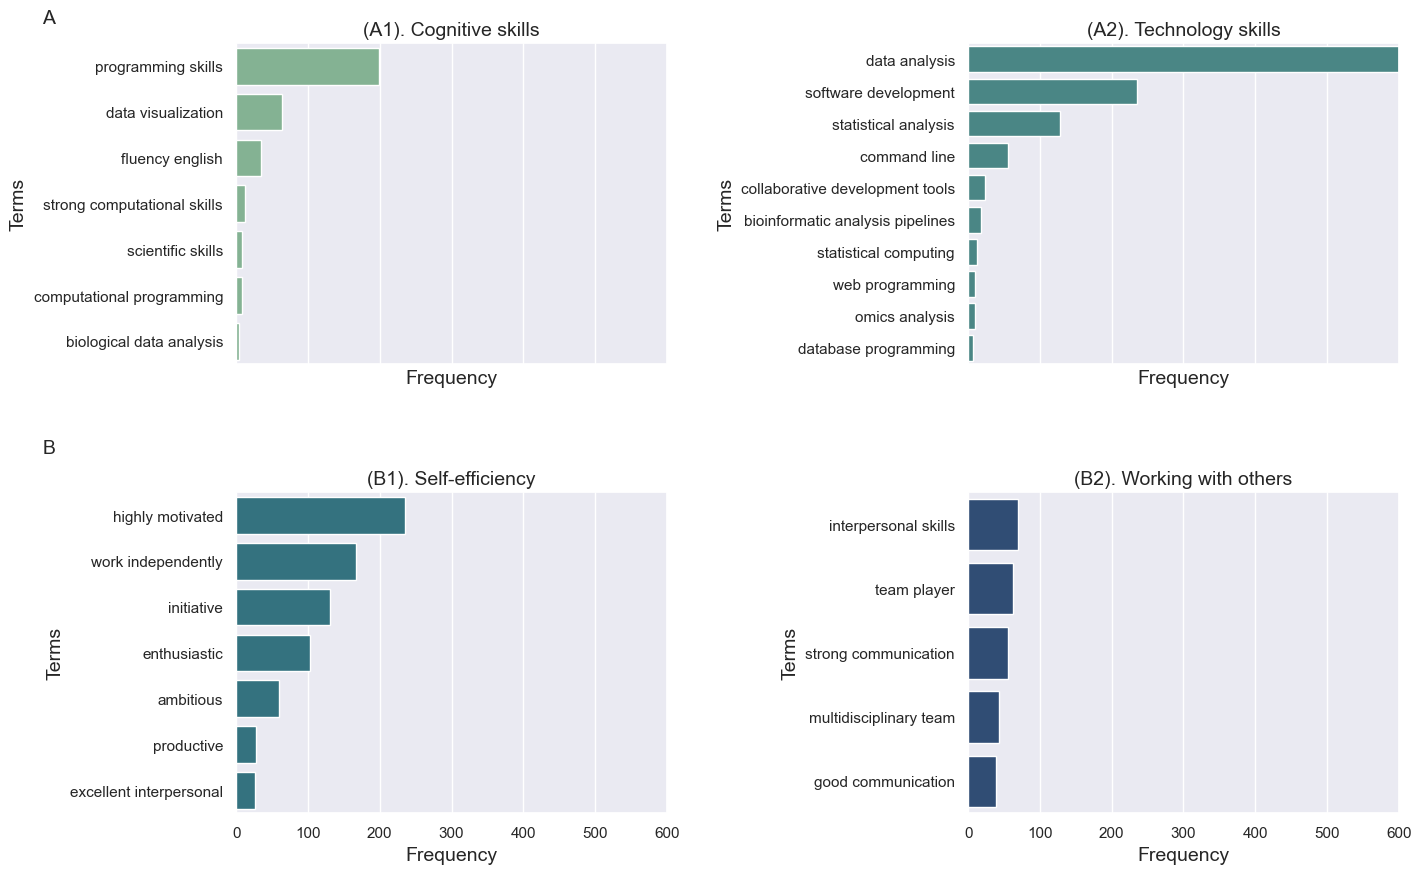

In [14]:
sns.set()
barras_qtd = 10
paleta = "crest"

df_top_0 = df_list[0].head(barras_qtd)
custom_palette_0 = [sns.color_palette(paleta)[0]]

df_top_1 = df_list[1].head(barras_qtd)
custom_palette_1 = [sns.color_palette(paleta)[2]]

df_top_2 = df_list[2].head(barras_qtd)
custom_palette_2 = [sns.color_palette(paleta)[3]]

df_top_3 = df_list[3].head(barras_qtd)
custom_palette_3 = [sns.color_palette(paleta)[5]]


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, gridspec_kw={"hspace": 0.4, "wspace": 0.7})

sns.barplot(ax=axes[0, 0], x='count', y=df_top_0.index, data=df_top_0, palette=custom_palette_0)
axes[0, 0].set_xlabel('Frequency', fontsize=14) 
axes[0, 0].set_ylabel('Terms', fontsize=14)
axes[0, 0].set_title('(A1). Cognitive skills', fontsize=14)

sns.barplot(ax=axes[0, 1], x='count', y=df_top_1.index, data=df_top_1, palette=custom_palette_1)
axes[0, 1].set_xlabel('Frequency', fontsize=14) 
axes[0, 1].set_ylabel('Terms', fontsize=14)
axes[0, 1].set_title('(A2). Technology skills', fontsize=14)

sns.barplot(ax=axes[1, 0], x='count', y=df_top_2.index, data=df_top_2, palette=custom_palette_2)
axes[1, 0].set_xlabel('Frequency', fontsize=14) 
axes[1, 0].set_ylabel('Terms', fontsize=14)
axes[1, 0].set_title('(B1). Self-efficiency', fontsize=14)

sns.barplot(ax=axes[1, 1], x='count', y=df_top_3.index, data=df_top_3, palette=custom_palette_3)
axes[1, 1].set_xlabel('Frequency', fontsize=14) 
axes[1, 1].set_ylabel('Terms', fontsize=14)
axes[1, 1].set_title('(B2). Working with others', fontsize=14)

fig.text(0.0, 0.9, 'A', fontsize=14, ha='center')
fig.text(0.0, 0.47, 'B', fontsize=14, ha='center')

max_value = max(df_top_0['count'].max(),
                df_top_1['count'].max(),
                df_top_2['count'].max(),
                df_top_3['count'].max()
               )
for ax in axes.flat:
    ax.set_xlim(0, max_value)
plt.savefig('img/skills.png')
plt.show()

### 5. **Knowledges**

In [15]:
dic_ads = {
    "Data science": [
        "artificial intelligence",
        "big data",
        "data mining",
        "deep learning",
        "high throughput data",
        "machine learning"
    ],
    "Computing": [
        "cloud computing",
        "computational pipelines",
        "computer clusters",
        "computer science",
        "computational_genomic",
        "deep genetic",
        "high performance computing",
        "lifestyle data",
        #"sdlc"
    ],
    "Bio": [
        "multi omics",
        "next generation sequencing",
        #"deep sequencing techniques",
        "drug discovery",
        #"epigenome wide association",
        "gene expression",
        "genetic data",
        "genome wide",
        "genomic",
        "metagenomic",
        "transcriptomic",
        "metatranscriptomic",
        "transcriptomic",
        "metatranscriptomic",
        "proteomic",
        "metabolomic",
        #"metabolism experimentation",
        "microarray",
        "microbial ecology",
        "molecular biology",
        "population_genomic",
        "statistical genetics",
        "system biology",
        "transcriptomic",
        #"viral_genomic",
        "small molecule",
        "biochemistry",
        "bioengineering",
        "biological data",
        "biological databases",
        "biophysics",
        "biotechnology",
        "cell biology",
        "chemical_genomic",
        #"bacteriophage communities"
    ]
}

In [16]:
dataframes_by_category = create_category_dataframes(df, dic_ads)

In [17]:
df_list = get_dataframes_list(df, dic_ads)

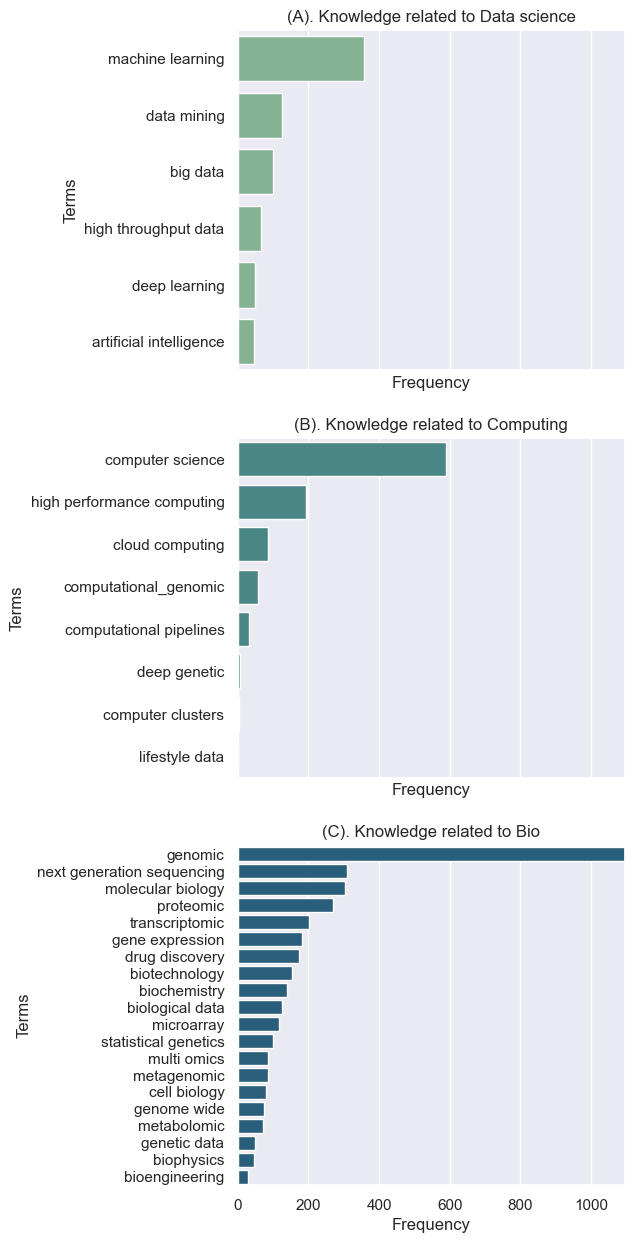

<Axes: title={'center': '(C). Knowledge related to Bio'}, xlabel='count', ylabel='Terms'>

In [18]:
sns.set()
barras_qtd = 20
paleta = "crest"

df_top_0 = df_list[0].head(barras_qtd)
custom_palette_0 = [sns.color_palette(paleta)[0]]

df_top_1 = df_list[1].head(barras_qtd)
custom_palette_1 = [sns.color_palette(paleta)[2]]

df_top_2 = df_list[2].head(barras_qtd)
custom_palette_2 = [sns.color_palette(paleta)[4]]

fig, axes = plt.subplots(nrows=3, figsize=(5, 15), sharex=True, gridspec_kw={"hspace": 0.2})

sns.barplot(ax=axes[0], x='count', y=df_top_0.index, data=df_top_0, palette=custom_palette_0)
axes[0].set_xlabel('Frequency', fontsize=12) 
axes[0].set_ylabel('Terms', fontsize=12)
axes[0].set_title('(A). Knowledge related to Data science', fontsize=12)

sns.barplot(ax=axes[1], x='count', y=df_top_1.index, data=df_top_1, palette=custom_palette_1)
axes[1].set_xlabel('Frequency', fontsize=12) 
axes[1].set_ylabel('Terms', fontsize=12)
axes[1].set_title('(B). Knowledge related to Computing', fontsize=12)

sns.barplot(ax=axes[2], x='count', y=df_top_2.index, data=df_top_2, palette=custom_palette_2)
axes[2].set_xlabel('Frequency', fontsize=12) 
axes[2].set_ylabel('Terms', fontsize=12)
axes[2].set_title('(C). Knowledge related to Bio', fontsize=12)

max_value = max(df_top_0['count'].max(),
                df_top_1['count'].max(),
                df_top_2['count'].max())
plt.xlim(0, max_value)

plt.savefig('img/knowledges.png')
plt.show()
sns.barplot(ax=axes[1], x='count', y=df_top_1.index, data=df_top_1, palette=custom_palette_1)
sns.barplot(ax=axes[2], x='count', y=df_top_2.index, data=df_top_2, palette=custom_palette_2)

### END!!!